# Assignment #5

## Due: November 17, 2020

Read in the [Volcano eruptions](https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv) data from the TidyTuesday project with `read_csv`.

Use the `print` function to find the number of rows and columns in the data.

In [1]:
library("tidyverse")

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [14]:
Volcano <- read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv")

Parsed with column specification:
cols(
  volcano_number = col_double(),
  volcano_name = col_character(),
  eruption_number = col_double(),
  eruption_category = col_character(),
  area_of_activity = col_character(),
  vei = col_double(),
  start_year = col_double(),
  start_month = col_double(),
  start_day = col_double(),
  evidence_method_dating = col_character(),
  end_year = col_double(),
  end_month = col_double(),
  end_day = col_double(),
  latitude = col_double(),
  longitude = col_double()
)



In [15]:
Volcano %>% print

# A tibble: 11,178 x 15
   volcano_number volcano_name eruption_number eruption_catego… area_of_activity
            <dbl> <chr>                  <dbl> <chr>            <chr>           
 1         266030 Soputan                22354 Confirmed Erupt… NA              
 2         343100 San Miguel             22355 Confirmed Erupt… NA              
 3         233020 Fournaise, …           22343 Confirmed Erupt… NA              
 4         345020 Rincon de l…           22346 Confirmed Erupt… NA              
 5         353010 Fernandina             22347 Confirmed Erupt… NA              
 6         273070 Taal                   22344 Confirmed Erupt… NA              
 7         282050 Kuchinoerab…           22345 Confirmed Erupt… NA              
 8         241040 Whakaari/Wh…           22338 Confirmed Erupt… 1978/90 Crater …
 9         311060 Semisopochn…           22341 Confirmed Erupt… NA              
10         284096 Nishinoshima           22340 Confirmed Erupt… NA              
# … 

Rows: 11,178; Columns: 15

Using `group_by`, `summarize` (or `count`), and `arrange`, find the volcano with the most recorded eruptions in the data. Remeber the [desc](https://dplyr.tidyverse.org/reference/desc.html) function can be used to sort in descending order.

In [56]:
Volcano_eruptions <-Volcano %>% 
   group_by(volcano_name) %>% 
   count() %>% 
   arrange(desc(volcano_name)) 

Volcano_eruptions %>% print

# A tibble: 921 x 2
# Groups:   volcano_name [921]
   volcano_name                 n
   <chr>                    <int>
 1 Zuni-Bandera                 2
 2 Zubair Group                 4
 3 Zitacuaro-Valle de Bravo     1
 4 Zhupanovsky                 15
 5 Zheltovsky                   6
 6 Zavodovski                   5
 7 Zavaritzki Caldera           2
 8 Zavaritsky                   2
 9 Zaozan [Zaosan]             52
10 Yunaska                      6
# … with 911 more rows


The volcano with the most recorded eruptions: Etna

Using `filter` and `arrange`, what is the year of the most recent eruption for the volcano above (i.e. the volcano with the most recorded eruptions in the data)? 

In [20]:
Volcano %>% 
filter(volcano_name == "Etna") %>%
arrange(desc(end_year)) %>% head

volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
211060,Etna,20841,Confirmed Eruption,New Southeast Crater (NSEC),2,2013,9,3,Historical Observations,2020,4,17,37.748,14.999
211060,Etna,13854,Confirmed Eruption,"Bocca Nuova, NE and SE Craters",1,2010,8,25,Historical Observations,2013,4,27,37.748,14.999
211060,Etna,13853,Confirmed Eruption,SE Crater,2,2010,4,8,Historical Observations,2010,4,8,37.748,14.999
211060,Etna,13852,Confirmed Eruption,East base of NE Crater (3000-2650 m),1,2008,5,13,Historical Observations,2009,7,4,37.748,14.999
211060,Etna,13849,Confirmed Eruption,"Bocca Nuova, SE Crater and flank vents",2,2007,3,19,Historical Observations,2008,5,16,37.748,14.999
211060,Etna,13848,Confirmed Eruption,SE Crater & flank vents; NE Crater,2,2006,7,14,Historical Observations,2006,12,15,37.748,14.999


The year of the most recent eruption for the volcano above: 2013 - 2020

Make a bar chart of eruption count by volcano_name. The bars should be sorted by frequency using `fct_infreq`. "Lump" the low frequency values into an "Other" category with `fct_lump`.

**Bonus:** Can you remove the "Other" category with the `filter` function if it dominates the chart?

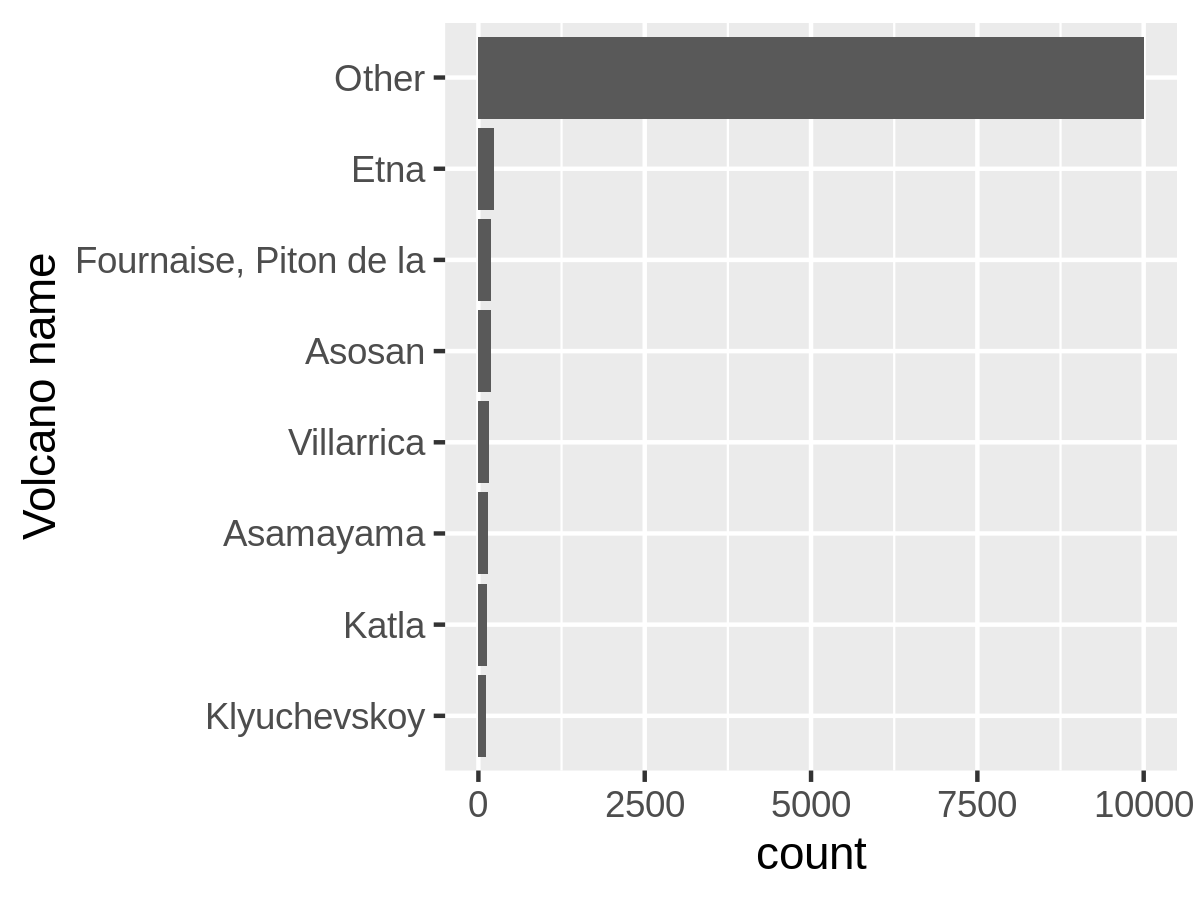

In [49]:
options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 300)

p = ggplot(Volcano, aes( y = volcano_name %>% fct_lump(n = 7) %>% fct_infreq() %>% fct_rev() ))

p = p +geom_bar()

p = p + labs(y = "Volcano name")

p

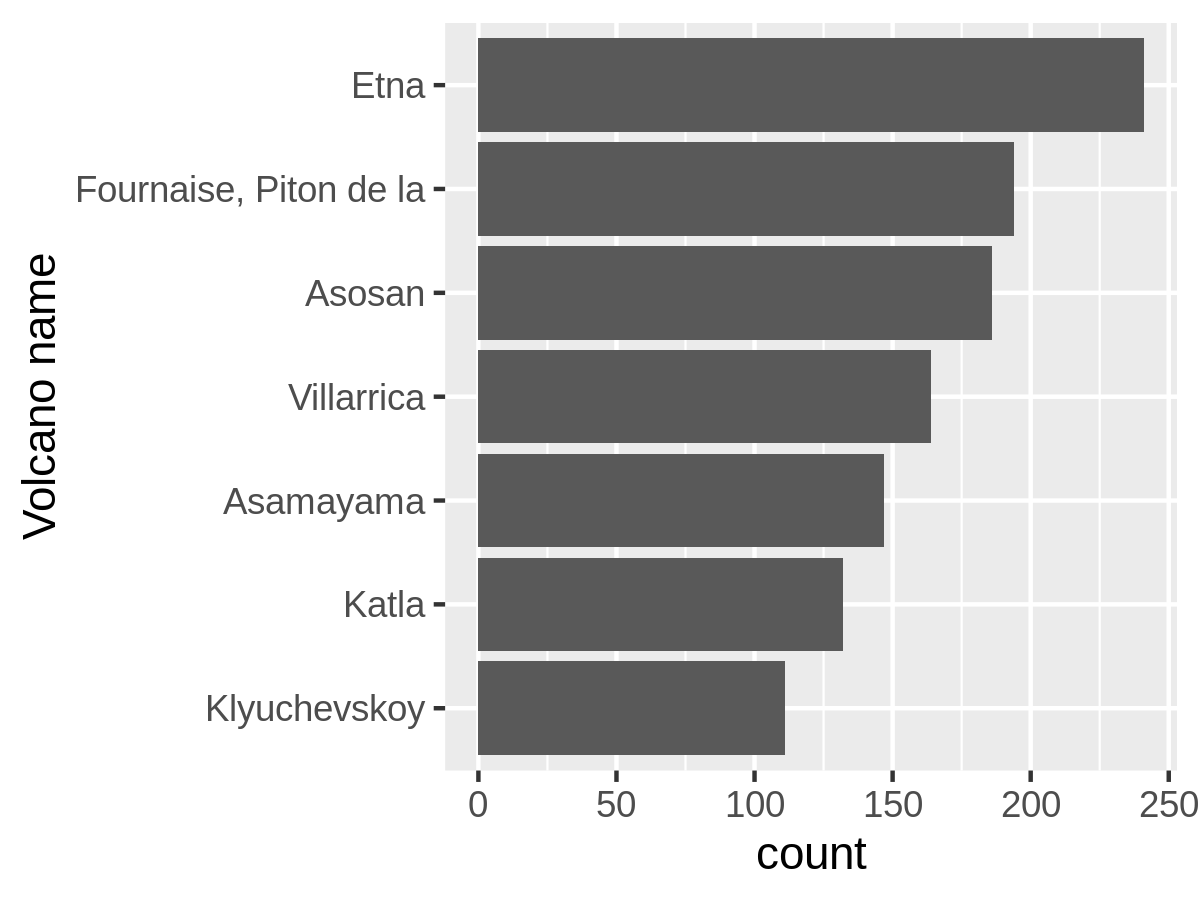

In [46]:
options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 300)

Volcano_remove = Volcano %>%
    mutate(Volcano_remove = volcano_name %>% fct_lump(n = 7) %>% fct_infreq() %>% fct_rev()) %>%
    filter(Volcano_remove != "Other")

p = ggplot(Volcano_remove, aes(y = Volcano_remove))

p = p + geom_bar()

p = p +labs(y = "Volcano name")

p

Using `mutate` generate a column that represents the span of each eruption in years (i.e. "end_year" minus "start_year"). Use `filter` to exclude eruption spans shorter than ten years. 

- Plot a histogram of your generated column (i.e. eruption spans greater than ten years).
- Which volcano(s) has/have the longest eruption span in years? How long did the eruption last?

In [54]:
Volcano_span = Volcano %>%
    mutate(span = end_year-start_year) %>%
    filter(span > 10) %>%
    arrange(desc(span))

Volcano_span %>% head

volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude,span
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
211040,Stromboli,13425,Confirmed Eruption,Summit craters and Sciara del Fuoco,3,1558,0,0,Historical Observations,1857,0,0,38.789,15.213,299
384010,Fogo,13128,Confirmed Eruption,Pico,1,1500,0,0,Historical Observations,1761,0,0,14.950,-24.350,261
257100,Yasur,15355,Confirmed Eruption,NA,3,1774,7,2,Historical Observations,2020,4,17,-19.532,169.447,246
352090,Sangay,11647,Confirmed Eruption,NA,3,1728,9,30,Historical Observations,1916,0,0,-2.005,-78.341,188
342030,Santa Maria,10626,Confirmed Eruption,SW flank (Santiaguito),3,1922,6,22,Historical Observations,2020,4,17,14.757,-91.552,98
268010,Dukono,16577,Confirmed Eruption,Malupang Magiwe and Malupang Warirang,3,1933,8,13,Historical Observations,2020,4,17,1.693,127.894,87


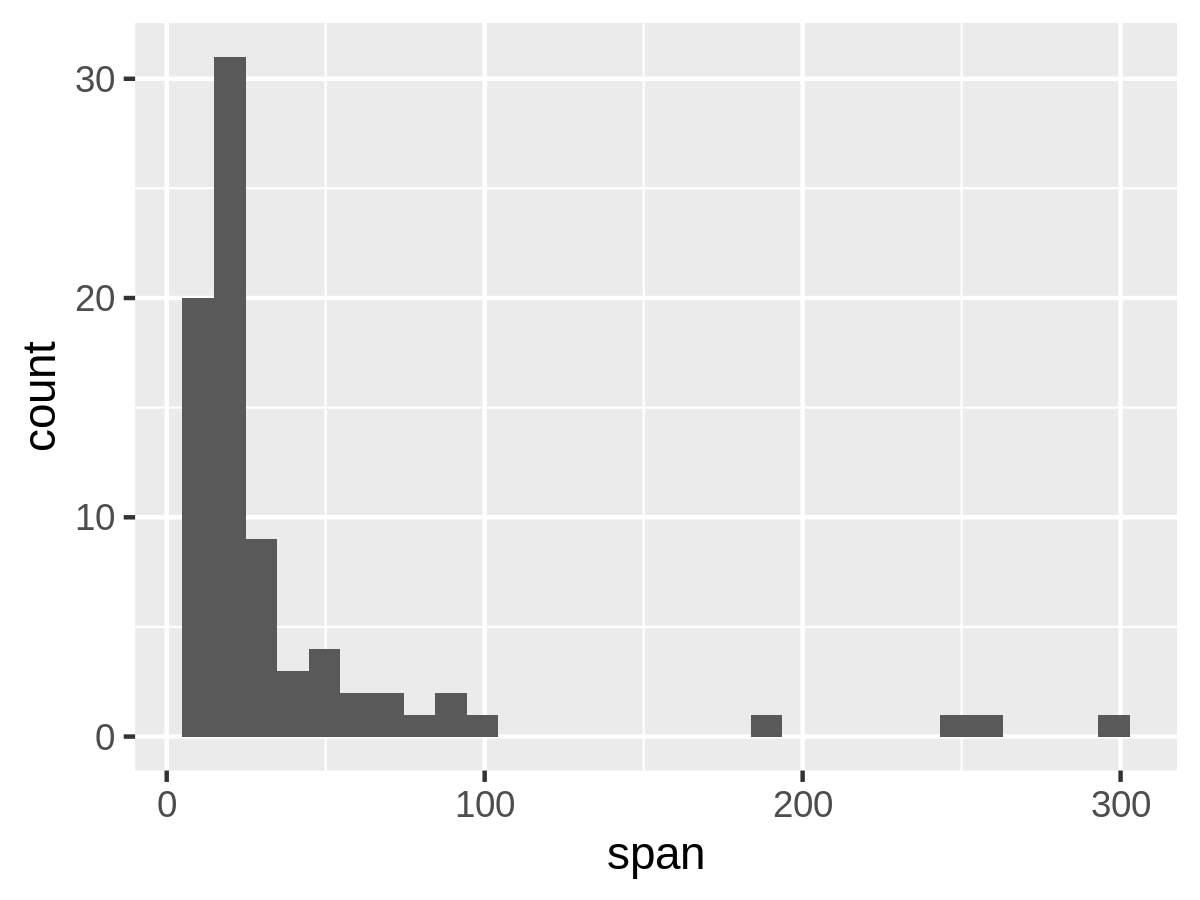

In [55]:
options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 300)

p = ggplot(Volcano_span, aes(x = span))

p = p + geom_histogram(bins = 30)

p

Volcano has the longest eruption span: Stromboli (299 years)